<a href="https://colab.research.google.com/github/jv-mendes07/previsao_custo_seguro_medico/blob/main/previs%C3%A3o_de_custo_do_seguro_m%C3%A9dico_(projeto_de_regress%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Custo do Seguro Médico (Projeto de Regressão)

### Projeto de Machine Learning

#### O objetivo de tal projeto é treinar um modelo preditivo de regressão que tenha uma acurácia razoável para realizar previsões relativas ao custo de seguro médico dos segurados, dado determinadas características dos segurados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importação de Bibliotecas

In [96]:
# Importação de bibliotecas que serão úteis no projeto:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#### (1) Coleta de Dados

In [97]:
# Importação do dataset:

df_insurance_cost = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [98]:
# Leitura das 5 primeiras linhas do dataset:

df_insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
# Quantidade de linhas e colunas atribuídas a variáveis:

l, c = df_insurance_cost.shape

In [100]:
# Impressão da quantidade de linhas e colunas:

print(f'Quantidade de Linhas: {l}\nQuantidade de Colunas: {c}')

Quantidade de Linhas: 1338
Quantidade de Colunas: 7


#### (2) Tratamento de Dados

In [101]:
# Informações gerais do dataset:

df_insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [102]:
# Quantidade de dados nulos no dataset:

df_insurance_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### (3) Análise Exploratória de Dados (EDA)

##### (1) Qual é a média de idade dos segurados?

In [103]:
# Informações estatísticas da idade dos segurados:

df_insurance_cost.age.describe().round()

count    1338.0
mean       39.0
std        14.0
min        18.0
25%        27.0
50%        39.0
75%        51.0
max        64.0
Name: age, dtype: float64

##### (2) Há correlação estatística entre a idade dos segurados e o custo de seguro médico?

In [104]:
# Correlação entre idade e custo de seguro médico:

df_insurance_cost.age.corr(df_insurance_cost.charges).round(2)

0.3

##### (3) Qual é a mediana de custos de seguro médico para jovens adultos (20 e 39 anos) e adultos maduros (40 e 64 anos)?

In [105]:
# Mediana de custos de seguro médico de jovens adultos:

df_insurance_cost[(df_insurance_cost.age >= 20) & (df_insurance_cost.age <= 39)].charges.median()

5080.096

In [106]:
# Mediana de custos de seguro médico de adultos maduros:

df_insurance_cost[(df_insurance_cost.age >= 40) & (df_insurance_cost.age <= 64)].charges.median()

11657.916975

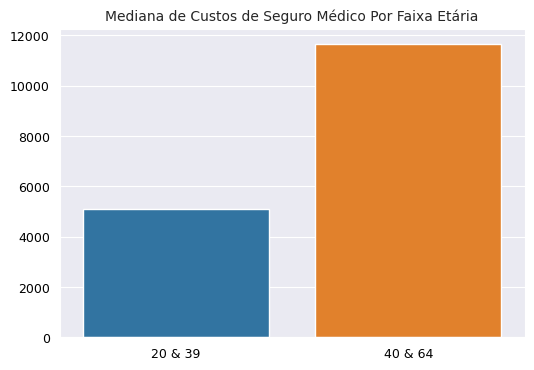

In [107]:
# Gráfico de coluna para expor os custos de seguro médico por faixa etária:

sns.set_style('darkgrid')
plt.figure(figsize = (6, 4))
sns.barplot(x=['20 & 39', '40 & 64'], y=[5080.096, 11657.916975])
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Mediana de Custos de Seguro Médico Por Faixa Etária', 
          fontsize = 10)
plt.show()

##### (4) Qual é a distribuição estatística da idade dos segurados?

In [108]:
# Importação de biblioteca para evitar impressão de avisos:

import warnings
warnings.filterwarnings('ignore')

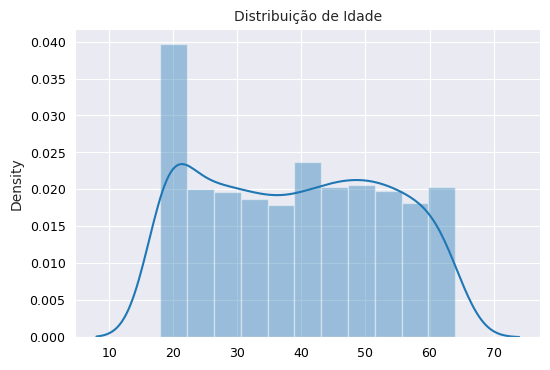

In [109]:
# Gráfico de distribuição estatística da idade dos segurados:

plt.figure(figsize = (6, 4))
sns.distplot(df_insurance_cost['age'])
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Distribuição de Idade', 
          fontsize = 10)
plt.xlabel('')
plt.show()

##### (5) Qual é a quantidade de segurados por gênero?

In [110]:
# Quantidade de segurados por gênero:

df_insurance_cost.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [111]:
# % da quantidade de segurados por gênero:

(df_insurance_cost.sex.value_counts(normalize = True) * 100).round(2)

male      50.52
female    49.48
Name: sex, dtype: float64

##### (6) Qual é a mediana de custo de seguro médico por gênero?

In [112]:
# Mediana de custo de seguro médico para segurados do sexo masculino:

df_insurance_cost[df_insurance_cost.sex == 'male'].charges.median()

9369.61575

In [113]:
# Mediana de custo de seguro médico para segurados do sexo feminino:

df_insurance_cost[df_insurance_cost.sex == 'female'].charges.median()

9412.9625

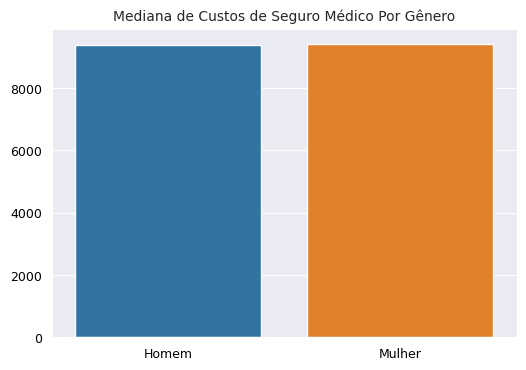

In [114]:
# Gráfico de coluna para exibir a mediana de custos de seguro médico por gênero

sns.set_style('darkgrid')
plt.figure(figsize = (6, 4))
sns.barplot(x=['Homem', 'Mulher'], y = [df_insurance_cost[df_insurance_cost.sex == 'male'].charges.median()
, df_insurance_cost[df_insurance_cost.sex == 'female'].charges.median()])
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Mediana de Custos de Seguro Médico Por Gênero', 
          fontsize = 10)
plt.show()

##### (7) Qual é a correlação estatística entre IMC (Índice de Massa Corporal) com o custo de seguro médico?

In [115]:
# Correlação entre IMC e custo de seguro médico:

df_insurance_cost.bmi.corr(df_insurance_cost['charges']).round(2)

0.2

##### (7) Qual é a mediana de custo de seguro médico por segurados abaixo do peso, acima do peso ou com o peso normal (com base no IMC)?

In [116]:
# Mediana de custo de seguro médico para segurados abaixo do peso:

df_insurance_cost[df_insurance_cost.bmi <= 18.5].charges.median()

6640.54485

In [117]:
# Mediana de custo de seguro médico para segurados com o peso normal:

df_insurance_cost[(df_insurance_cost.bmi >= 18.5) & (df_insurance_cost.bmi <= 24.9)].charges.median()

8604.153525

In [118]:
# Mediana de custo de seguro médico para segurados acima do peso:

df_insurance_cost[df_insurance_cost.bmi >= 25].charges.median()

9563.029

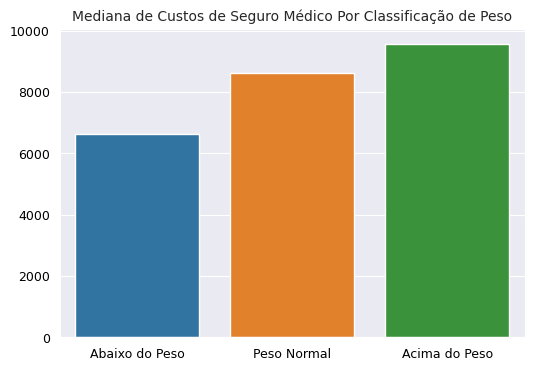

In [119]:
# Gráfico de coluna com a mediana de custos de seguro médico por classificação de peso:

plt.figure(figsize = (6, 4))
sns.barplot(x=['Abaixo do Peso', 'Peso Normal',
               'Acima do Peso'], y = [df_insurance_cost[df_insurance_cost.bmi <= 18.5].charges.median()
, df_insurance_cost[(df_insurance_cost.bmi >= 18.5) & (df_insurance_cost.bmi <= 24.9)].charges.median(),
df_insurance_cost[df_insurance_cost.bmi >= 25].charges.median()])
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Mediana de Custos de Seguro Médico Por Classificação de Peso', 
          fontsize = 10)
plt.show()

##### (8) Qual é a distribuição estatística do IMC dos segurados?

In [120]:
# Informações estatísticas do IMC dos segurados:

df_insurance_cost.bmi.describe().round(2)

count    1338.00
mean       30.66
std         6.10
min        15.96
25%        26.30
50%        30.40
75%        34.69
max        53.13
Name: bmi, dtype: float64

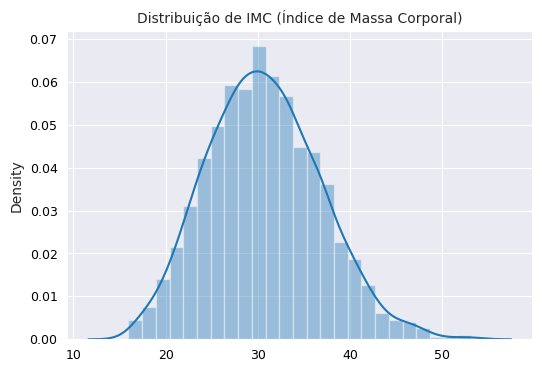

In [121]:
# Gráfico de distribuição estatística do IMC dos segurados:

plt.figure(figsize = (6, 4))
sns.distplot(df_insurance_cost['bmi'])
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Distribuição de IMC (Índice de Massa Corporal)', 
          fontsize = 10)
plt.xlabel('')
plt.show()

##### (9) Qual é a quantidade de segurados pela quantidade de filhos?

In [122]:
# Quantidade de segurados por quantidade de filhos:

df_insurance_cost.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [123]:
# % da quantidade de segurados por quantidade de filhos:

(df_insurance_cost.children.value_counts(normalize = True) * 100).round(2)

0    42.90
1    24.22
2    17.94
3    11.73
4     1.87
5     1.35
Name: children, dtype: float64

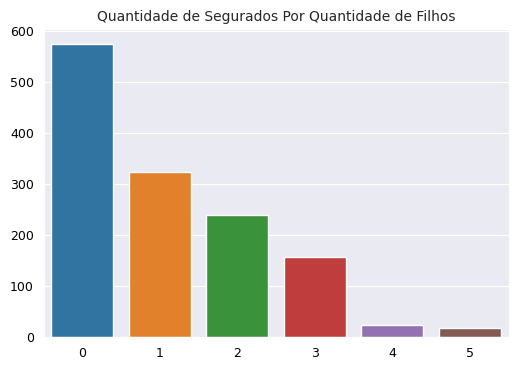

In [124]:
# Gráfico de coluna com a quantidade de segurados por quantidade de filhos:

plt.figure(figsize = (6, 4))
sns.countplot(x = 'children', data = df_insurance_cost)
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Quantidade de Segurados Por Quantidade de Filhos', 
          fontsize = 10)
plt.ylabel('')
plt.xlabel('')
plt.show()

##### (10) Qual é a mediana de custos de seguro médico com base na quantidade de filhos do segurado?

In [125]:
# Mediana de custos de seguro médico com base na quantidade de filhos do segurado:

df_insurance_cost.groupby('children').agg({'charges': 'median'}).rename(columns = {'charges': 'median_charges'}).sort_values(
    'median_charges', ascending = False
).round(2)

,median_charges
children,
4,11033.66
3,10600.55
0,9856.95
2,9264.98
5,8589.57
1,8483.87


##### (11) Qual é a mediana de custos de seguro médico por fumantes e não-fumantes?

In [126]:
# Quantidade de segurados fumantes e não-fumantes:

df_insurance_cost.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [127]:
# % de quantidade de segurados fumantes e não-fumantes:


((df_insurance_cost.smoker.value_counts(normalize = True)) * 100).round(2)

no     79.52
yes    20.48
Name: smoker, dtype: float64

In [128]:
# Mediana de custo de seguro médico para fumantes e não-fumantes:

df_insurance_cost.groupby('smoker').agg({'charges': 'median'}).rename(columns = {'charges': 'median_charges'}).sort_values(
    'median_charges', ascending = False
).round(2)

,median_charges
smoker,
yes,34456.35
no,7345.41


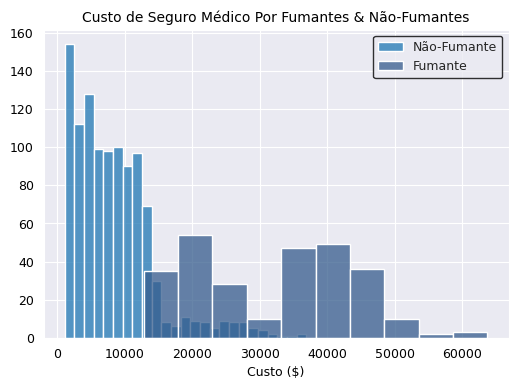

In [129]:
# Distribuição estatística de custo de seguro médico por segurados fumantes e não-fumantes:

plt.figure(figsize = (6, 4))
sns.histplot(df_insurance_cost[df_insurance_cost['smoker'] == 'no'].charges, label = 'Não-Fumante',
             kde = False)
sns.histplot(df_insurance_cost[df_insurance_cost['smoker'] == 'yes'].charges, label = 'Fumante',
             kde = False, color = sns.color_palette('viridis')[1])

plt.xlabel('Custo ($)', fontsize = 9, color = 'k')
plt.xticks( fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Custo de Seguro Médico Por Fumantes & Não-Fumantes', fontsize = 10, color = 'k')
plt.legend(edgecolor = 'k', fontsize = 9);

##### (12) Qual é o custo de seguro médico por região?

In [130]:
# Quantidade de segurados por região:

df_insurance_cost.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [131]:
# % de quantidade de segurados por região:

(df_insurance_cost.region.value_counts(normalize = True) * 100).round(2)

southeast    27.20
southwest    24.29
northwest    24.29
northeast    24.22
Name: region, dtype: float64

In [132]:
# Mediana de custo de seguro médico por região:

df_insurance_cost.groupby('region').agg({'charges': 'median'}).rename(columns = {'charges': 'median_charges'}).sort_values(
    'median_charges', ascending = False
).reset_index().round(2)

,region,median_charges
0,northeast,10057.65
1,southeast,9294.13
2,northwest,8965.80
3,southwest,8798.59


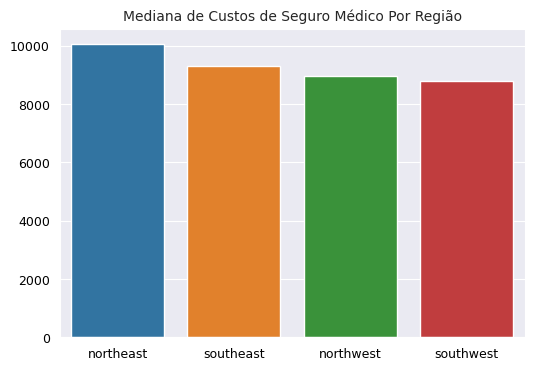

In [133]:
# Gráfico de coluna com a mediana de custo de seguro médico por região: 

plt.figure(figsize = (6, 4))
sns.barplot(x = 'region', y = 'median_charges', data = df_insurance_cost.groupby('region'
).agg({'charges': 'median'}).rename(columns = {'charges': 'median_charges'}).sort_values(
    'median_charges', ascending = False
).reset_index().round(2))
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Mediana de Custos de Seguro Médico Por Região', 
          fontsize = 10)
plt.ylabel('')
plt.xlabel('')
plt.show()

##### (13) Qual é a distribuição estatística do custos de seguro médico?

In [134]:
# Informações estatísticas do custo de seguro médico dos segurados:

df_insurance_cost.charges.describe().round(2)

count     1338.00
mean     13270.42
std      12110.01
min       1121.87
25%       4740.29
50%       9382.03
75%      16639.91
max      63770.43
Name: charges, dtype: float64

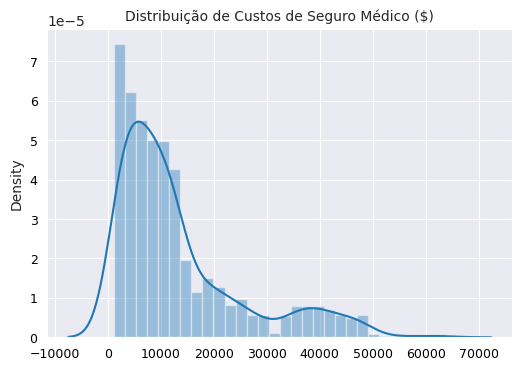

In [135]:
# Distribuição estatística do custo de seguro médico:

plt.figure(figsize = (6, 4))
sns.distplot(df_insurance_cost['charges'])
plt.xticks(fontsize = 9, color ='k')
plt.yticks(fontsize = 9, color ='k')
plt.title('Distribuição de Custos de Seguro Médico ($)', 
          fontsize = 10)
plt.xlabel('')
plt.show()

#### Pré-Processamento de Dados

##### Label-Encoding

In [136]:
# Label-Encoding das variáveis 'sex' e 'smoker':

df_insurance_cost.replace({'sex': {'female': 0, 'male': 1},
           'smoker': {'no': 0, 'yes': 1}}, inplace = True)

In [137]:
# Visualização da aplicação do Label-Encoding sobre tais variáveis:

df_insurance_cost[['sex', 'smoker']].head()

,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


##### One-Hot Encoding

In [138]:
# Criação de variáveis dummy sobre a variável 'region':

df_insurance_cost = pd.concat([df_insurance_cost, pd.get_dummies(df_insurance_cost['region'], drop_first=True)], 
              axis = 1).drop('region', axis = 1)

In [139]:
# Aplicação de mudança de tipo de dado das variáveis dummy criadas:

df_insurance_cost[['northwest', 'southeast', 'southwest']] = df_insurance_cost[['northwest', 'southeast', 'southwest']].astype('int')

In [140]:
# Verificação de tal mudança de tipo de dado das variáveis dummy criadas:

df_insurance_cost[['northwest', 'southeast', 'southwest']].dtypes

northwest    int64
southeast    int64
southwest    int64
dtype: object

#### Dados de Treino & Dados de Teste

##### Variáveis Preditoras & Variável-target

In [141]:
# Variáveis-preditoras:

X = df_insurance_cost.drop('charges', axis = 1)

In [142]:
# Visualização das variáveis preditoras:

X.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [143]:
# Variável-target:

y = df_insurance_cost.charges.values

In [144]:
# Visualização da variável-target:

y[:5]

array([16884.924 ,  1725.5523,  4449.462 , 21984.4706,  3866.8552])

In [145]:
# Divisão do conjunto de dados em dados de treino e dados de teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 32)

#### Transformação Log 

In [146]:
# Importação de método para aplicar transformação logarítmica na variável-alvo:

from sklearn.preprocessing import FunctionTransformer

In [147]:
# Atribuição de tal método transformacional para uma variável:

transformer = FunctionTransformer(np.log1p)

In [148]:
# Transformação logarítmica da variável-alvo nos dados de treino:

y_train_log = transformer.fit_transform(y_train)

In [149]:
# Transformação logarítmica da variável-alvo nos dados de teste:

y_test_log = transformer.transform(y_test)

#### Treinamento & Avaliação de Modelo

##### Regressão Linear

In [150]:
# Regressão linear atribuída à uma variável:

lin_reg = LinearRegression()

In [151]:
# Treino da regressão linear sobre dados de treino:

lin_reg.fit(X_train, y_train_log)

LinearRegression()

In [152]:
# Predição de dados com o modelo treinado sobre os dados de teste:

y_pred = lin_reg.predict(X_test)

In [153]:
# Reversão da transformação logarítmica da variável-alvo:

y_pred_original_scale = np.exp(y_pred)

In [154]:
# R-Score do modelo treinado:

r2_score = metrics.r2_score(y_pred_original_scale, np.exp(y_test_log))

In [155]:
# R-Score da regressão linear treinada:

r2_score

0.6862424349878844

In [156]:
# Média de acurácia preditiva do modelo de regressão linear:

cross_val_score(lin_reg, X_test, y_test_log).mean()

0.7719433032418914

In [157]:
# Erro mediano absoluto da regressão linear:

med_ae = metrics.median_absolute_error(np.exp(y_test_log), y_pred_original_scale)

In [158]:
# Erro mediano absoluto:

print(f'Erro Mediano Absoluto: {med_ae}')

Erro Mediano Absoluto: 1024.2095915267057


In [159]:
# Visualização comparativa dos dados previsto em relação aos dados reais:

np.set_printoptions(precision=4, suppress=True)

np.concatenate((y_pred_original_scale.reshape(-1,1), np.exp(y_test_log).reshape(-1,1)), axis=1)

array([[ 8320.2355,  9488.6442],
       [16091.6691, 18224.4512],
       [ 5249.1519,  5268.8182],
       [11843.3531, 11521.0998],
       [ 8613.8393, 10578.087 ],
       [ 3236.8792, 11273.3314],
       [50935.6187, 45703.0224],
       [ 4095.3701,  3559.6203],
       [ 4992.0062,  5416.6612],
       [10143.8276,  9584.8933],
       [ 4008.9385,  3214.6221],
       [ 3291.5205, 18956.2202],
       [12895.071 , 12929.7911],
       [36935.6316, 45864.205 ],
       [ 9608.7637,  8084.9198],
       [40973.1879, 42970.8527],
       [13339.6309, 20710.0203],
       [10136.5046, 11083.5772],
       [ 8125.4004,  7805.1605],
       [ 7611.7325,  8540.671 ],
       [ 7276.4568,  6747.7425],
       [11645.5542, 13205.2856],
       [12778.7329, 12649.7034],
       [ 4855.4598,  4238.1266],
       [49472.1322, 43255.4179],
       [ 2933.2016,  2151.469 ],
       [ 8295.191 ,  7750.1564],
       [14052.6317, 17086.2676],
       [ 9845.4889,  9631.397 ],
       [30025.3603, 21473.4788],
       [ 2

##### Floresta Aleatória

In [160]:
# Floresta aleatória atribuída à uma variável:

random_forest = RandomForestRegressor(n_estimators = 175)

In [161]:
# Treino da Floresta aleatória sobre dados de treino:

random_forest.fit(X_train, y_train_log)

RandomForestRegressor(n_estimators=175)

In [162]:
# Predição de dados com o modelo treinado sobre os dados de teste:

y_pred_02 = random_forest.predict(X_test)

In [163]:
# Reversão da transformação logarítmica da variável-alvo:

y_pred_original_scale_02 = np.exp(y_pred_02)

In [164]:
# R-Score do modelo treinado:


r2_score = metrics.r2_score(np.exp(y_test_log), y_pred_original_scale_02)

In [165]:
# R-Score da Floresta aleatória treinada:

r2_score

0.8510326660605585

In [166]:
# Média de acurácia preditiva do modelo de Floresta aleatória:

cross_val_score(random_forest, X_test, y_test_log).mean()

0.8031967771447313

In [167]:
# Erro mediano absoluto da Floresta aleatória:

med_ae = metrics.median_absolute_error(np.exp(y_test_log), y_pred_original_scale_02)

In [168]:
# Erro mediano absoluto:

print(f'Erro Mediano Absoluto: {med_ae}')

Erro Mediano Absoluto: 674.8857852302372


In [169]:
# Visualização comparativa dos dados previsto em relação aos dados reais:

np.concatenate((y_pred_original_scale_02.reshape(-1,1), np.exp(y_test_log).reshape(-1,1)), axis=1)

array([[18209.816 ,  9488.6442],
       [16865.0857, 18224.4512],
       [ 5330.5403,  5268.8182],
       [18385.2884, 11521.0998],
       [11125.3713, 10578.087 ],
       [ 1892.8074, 11273.3314],
       [44273.3389, 45703.0224],
       [ 3384.4609,  3559.6203],
       [ 5925.8721,  5416.6612],
       [11063.29  ,  9584.8933],
       [ 3209.9925,  3214.6221],
       [ 3318.195 , 18956.2202],
       [15346.1896, 12929.7911],
       [48049.0241, 45864.205 ],
       [ 8838.6903,  8084.9198],
       [43141.4541, 42970.8527],
       [11702.3197, 20710.0203],
       [11403.1368, 11083.5772],
       [ 9780.0188,  7805.1605],
       [15198.9414,  8540.671 ],
       [ 6815.0192,  6747.7425],
       [13368.8461, 13205.2856],
       [14190.3853, 12649.7034],
       [ 4591.5291,  4238.1266],
       [45929.5965, 43255.4179],
       [ 2260.2071,  2151.469 ],
       [ 7581.7433,  7750.1564],
       [16819.7314, 17086.2676],
       [13882.8774,  9631.397 ],
       [20644.3981, 21473.4788],
       [ 1

##### Árvore de decisão

In [170]:
#  Árvore de decisão atribuída à uma variável:

decision_tree = DecisionTreeRegressor()

In [171]:
# Árvore de decisão treinada com dados de treino:

decision_tree.fit(X_train, y_train_log)

DecisionTreeRegressor()

In [172]:
# Predição de dados com o modelo treinado com os dados de teste:

y_pred_03 = decision_tree.predict(X_test)

In [173]:
# Reversão da transformação logarítmica da variável-alvo:

y_pred_original_scale_03 = np.exp(y_pred_03)

In [174]:
# R-Score do modelo treinado:

r2_score = metrics.r2_score(np.exp(y_test_log), y_pred_original_scale_03)

In [175]:
# R-Score da Árvore de decisão:

r2_score

0.5966257085365267

In [176]:
# Média da acurácia preditiva da árvore de decisão:

cross_val_score(decision_tree, X_test, y_test_log).mean()

0.6632447070731353

In [177]:
# Erro mediano absoluto da Árvore de decisão:

med_ae = metrics.median_absolute_error(np.exp(y_test_log), y_pred_original_scale_03)

In [178]:
# Erro mediano absoluto:

print(f'Erro Mediano Absoluto: {med_ae}')

Erro Mediano Absoluto: 499.57095000000254


In [179]:
# Visualização comparativa dos dados previstos em relação aos dados reais:

np.concatenate((y_pred_original_scale_03.reshape(-1,1), np.exp(y_test_log).reshape(-1,1)), axis=1)

array([[27347.0421,  9488.6442],
       [17749.5062, 18224.4512],
       [ 5267.3656,  5268.8182],
       [26237.58  , 11521.0998],
       [11166.4176, 10578.087 ],
       [ 1721.3537, 11273.3314],
       [42984.4585, 45703.0224],
       [ 2975.126 ,  3559.6203],
       [ 5921.1041,  5416.6612],
       [ 9867.3048,  9584.8933],
       [ 3207.4914,  3214.6221],
       [ 2633.992 , 18956.2202],
       [12926.886 , 12929.7911],
       [43897.3763, 45864.205 ],
       [ 8570.8618,  8084.9198],
       [41677.0811, 42970.8527],
       [11577.13  , 20710.0203],
       [10595.5016, 11083.5772],
       [ 8284.6807,  7805.1605],
       [10157.7832,  8540.671 ],
       [ 6749.5912,  6747.7425],
       [14450.8544, 13205.2856],
       [12742.1675, 12649.7034],
       [ 3660.346 ,  4238.1266],
       [44424.803 , 43255.4179],
       [ 2732.9122,  2151.469 ],
       [ 8018.0612,  7750.1564],
       [17749.5062, 17086.2676],
       [10119.424 ,  9631.397 ],
       [20985.0936, 21473.4788],
       [ 1

#### XGBoost Regressor

In [180]:
# XGBRegressor atribuído à uma variável:

xgb_reg = XGBRegressor()

In [181]:
# Treino do XGBRegressor:

xgb_reg.fit(X_train, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [182]:
# Predição de dados do modelo treinado sobre os dados de teste:

y_pred_04 = xgb_reg.predict(X_test)

In [183]:
# Reversão logarítmica da variável-alvo, em retorno à escala original:

y_pred_original_scale_04 = np.exp(y_pred_04)

In [184]:
# R-Score do XGBRegressor:

r2_score = metrics.r2_score(np.exp(y_test_log), y_pred_original_scale_04)

In [185]:
# R-score:

r2_score

0.702406843824345

In [186]:
# Média de acurácia preditiva do XGBRegressor treinado:

cross_val_score(xgb_reg, X_test, y_pred_original_scale_04).mean()

0.8295703319428653

In [187]:
# Erro mediano absoluto do XGBRegressor:

med_ae = metrics.median_absolute_error(np.exp(y_test_log), y_pred_original_scale_04)

In [188]:
# Erro mediano absoluto:

print(f'Erro Mediano Absoluto: {med_ae}')

Erro Mediano Absoluto: 1052.7632976562554


In [189]:
# Visualização comparativa dos dados previstos em relação aos dados reais:

np.concatenate((y_pred_original_scale_04.reshape(-1,1), np.exp(y_test_log).reshape(-1,1)), axis=1)

array([[14499.6475,  9488.6442],
       [23375.6484, 18224.4512],
       [ 4723.522 ,  5268.8182],
       [11150.4473, 11521.0998],
       [11200.2715, 10578.087 ],
       [ 2378.2651, 11273.3314],
       [52556.2578, 45703.0224],
       [ 4778.937 ,  3559.6203],
       [ 5666.5615,  5416.6612],
       [ 8577.8057,  9584.8933],
       [ 3761.1035,  3214.6221],
       [ 3147.0842, 18956.2202],
       [17291.0801, 12929.7911],
       [55625.7305, 45864.205 ],
       [ 7612.6729,  8084.9198],
       [42699.1758, 42970.8527],
       [11646.7285, 20710.0203],
       [11522.2637, 11083.5772],
       [ 8163.623 ,  7805.1605],
       [14402.5967,  8540.671 ],
       [ 8071.0464,  6747.7425],
       [11924.9131, 13205.2856],
       [13622.3662, 12649.7034],
       [ 4475.1187,  4238.1266],
       [39358.7617, 43255.4179],
       [ 2430.3816,  2151.469 ],
       [ 7556.9902,  7750.1564],
       [14974.3467, 17086.2676],
       [14598.4512,  9631.397 ],
       [23204.2461, 21473.4788],
       [ 1

#### Gráfico - Dados Previsto & Dados Reais

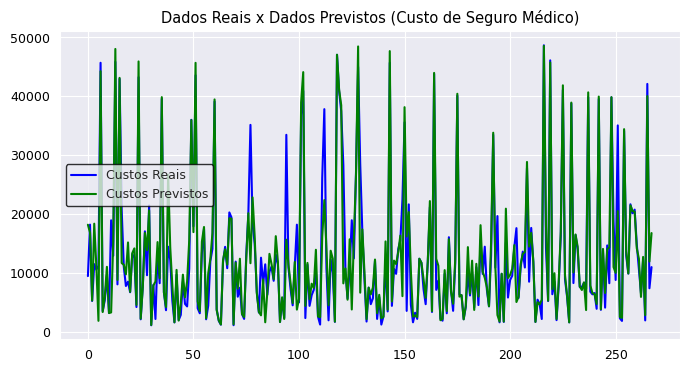

In [191]:
# Gráfico para saber comparativamente o quão próximo os dados previstos pelo modelo estão em relação aos dados reais do custo de seguro médico:

sns.set_style('darkgrid')
plt.figure(figsize = (8, 4))
plt.plot(np.exp(y_test_log), color = 'blue', label = 'Custos Reais')
plt.plot(y_pred_original_scale_02, color = 'green', label = 'Custos Previstos')
plt.title('Dados Reais x Dados Previstos (Custo de Seguro Médico)', fontsize = 10.5, color ='k')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.legend(edgecolor = 'k', fontsize = 9);

# FIM